In [26]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv(r'Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df_corr = df.drop('country', axis=1)
correlation_matrix = df_corr.corr()
correlation_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [9]:
df_corr = df.drop('country', axis=1)
correlation_matrix = df_corr.corr()

linkage_matrix = hierarchy.linkage(correlation_matrix, method='ward')
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=correlation_matrix.columns, orientation='top', distance_sort='descending', no_plot=True)

def extract_feature_groups(dendrogram, num_groups):
    feature_groups = []
    current_group = []
    for label in dendrogram['ivl']:
        if isinstance(label, str): 
            current_group.append(label)
            if len(current_group) == num_groups:
                feature_groups.append(current_group)
                current_group = []
    return feature_groups

num_feature_groups = 3
feature_groups = extract_feature_groups(dendrogram, num_feature_groups)

for i, group in enumerate(feature_groups, start=1):
    print(f'Group {i}: {group}')

Group 1: ['gdpp', 'income', 'life_expec']
Group 2: ['health', 'imports', 'exports']
Group 3: ['total_fer', 'child_mort', 'inflation']


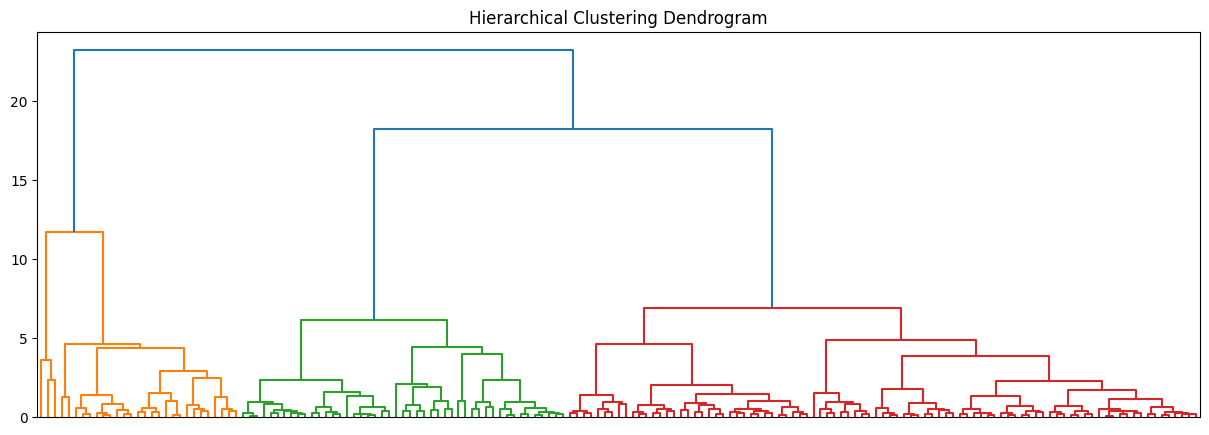

In [23]:
linkage_matrix = hierarchy.linkage(features_scaled, method='ward')
plt.figure(figsize=(15, 5)) 
dendrogram_plot = hierarchy.dendrogram(linkage_matrix, no_labels=True, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [10]:
df['group1'] = df[['gdpp', 'income', 'life_expec']].mean(axis=1)
df['group2'] = df[['health', 'imports', 'exports']].mean(axis=1)
df['group3'] = df[['total_fer', 'child_mort', 'inflation']].mean(axis=1)
print(df[['country', 'group1', 'group2', 'group3']])

                 country        group1     group2     group3
0            Afghanistan    739.733333  20.826667  35.153333
1                Albania   4698.766667  27.716667   7.580000
2                Algeria   5812.166667  24.656667  15.430000
3                 Angola   3163.366667  36.016667  49.186667
4    Antigua and Barbuda  10458.933333  36.810000   4.623333
..                   ...           ...        ...        ...
162              Vanuatu   1994.333333  34.850000  11.773333
163            Venezuela  10025.133333  17.003333  21.823333
164              Vietnam   1957.700000  53.013333  12.450000
165                Yemen   1952.500000  23.193333  28.190000
166               Zambia   1597.333333  24.596667  34.166667

[167 rows x 4 columns]


In [14]:
new_df = df[['country', 'group1', 'group2', 'group3']]
new_df.head()

,country,group1,group2,group3
0,Afghanistan,739.733333,20.826667,35.153333
1,Albania,4698.766667,27.716667,7.580000
2,Algeria,5812.166667,24.656667,15.430000
3,Angola,3163.366667,36.016667,49.186667
4,Antigua and Barbuda,10458.933333,36.810000,4.623333


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hp\AppData\Local\Temp\ipykernel_1360\3417399970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = kmeans.fit_predict(features_scaled)
C:\Users\hp\AppData\Local\Temp\ipykernel_1360\3417399970.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worl

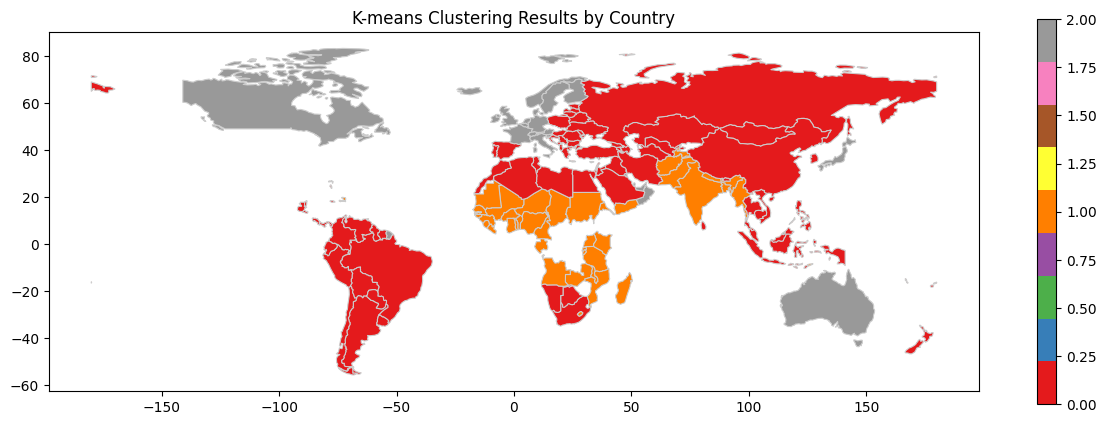

In [24]:
features = new_df.drop('country', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
new_df['cluster'] = kmeans.fit_predict(features_scaled)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world.merge(new_df, how='left', left_on='name', right_on='country')

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
merged_data.plot(column='cluster', cmap='Set1', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('K-means Clustering Results by Country')
plt.show()

In [25]:
silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5414693977850987
